**Bukti 1 Mengumpulkan data**

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
data = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [104]:
data.drop(['customerID'], axis=1, inplace=True)

In [105]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,F,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [106]:
data.shape

(7043, 20)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7038 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7040 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [108]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].astype('float64')

**Bukti 2 Menelaah Data**

In [109]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7040.000000,7043.000000,7032.000000
mean,35.043892,64.761692,2283.300441
std,115.282871,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,7100.000000,118.750000,8684.800000


In [110]:
kolom_kategori = [i for i in data.columns if data[i].dtype == 'object']
print(f'Data kategori: {kolom_kategori}\n')

kolom_numerik = [i for i in data.columns if data[i].dtype != 'object']
print(f'Data numerik: {kolom_numerik}')

Data kategori: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Data numerik: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [111]:
kolom_numerik.append('Churn')

In [112]:
data_numerik = data[kolom_numerik]
data_kategori = data[kolom_kategori]

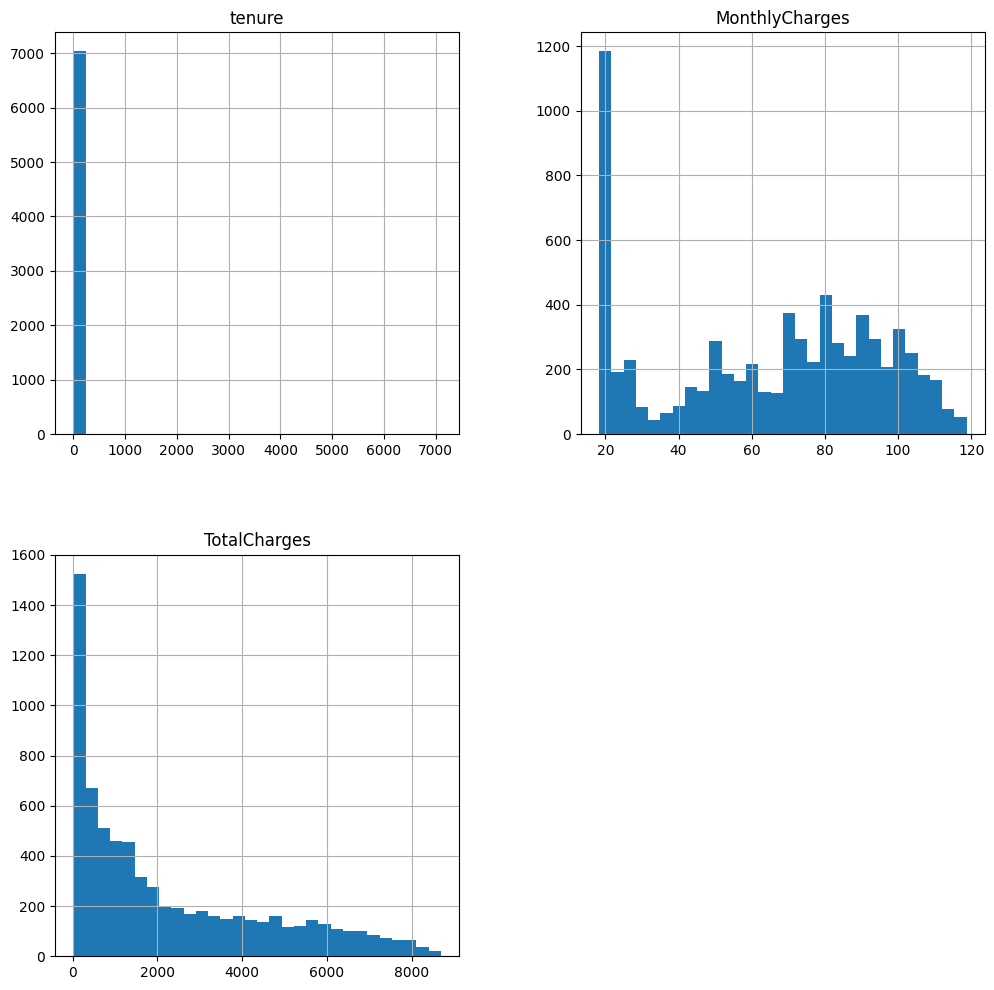

In [113]:
data_numerik.hist(bins=30, figsize=(12,12))
plt.show()

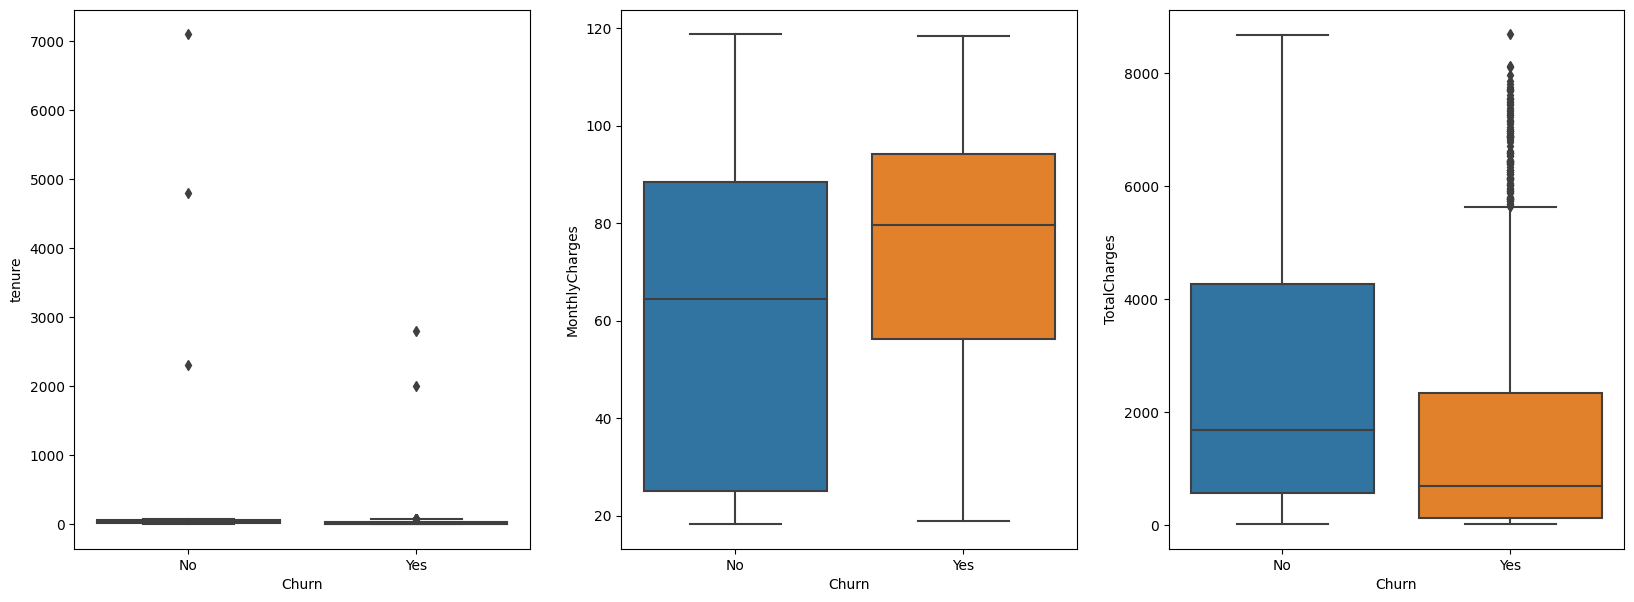

In [114]:
fig, ax = plt.subplots(1, 3, figsize = (20,7))

for i, ax in enumerate(fig.axes):
    if i < len(data_numerik.columns)-1:
        sns.boxplot(x='Churn', y = data_numerik.columns[i], data=data_numerik, showfliers=True, ax=ax)

plt.show()

In [115]:
data_numerik.skew()

<ipython-input-115-6742613aeaf3>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_numerik.skew()


tenure            46.483009
MonthlyCharges    -0.220524
TotalCharges       0.961642
dtype: float64

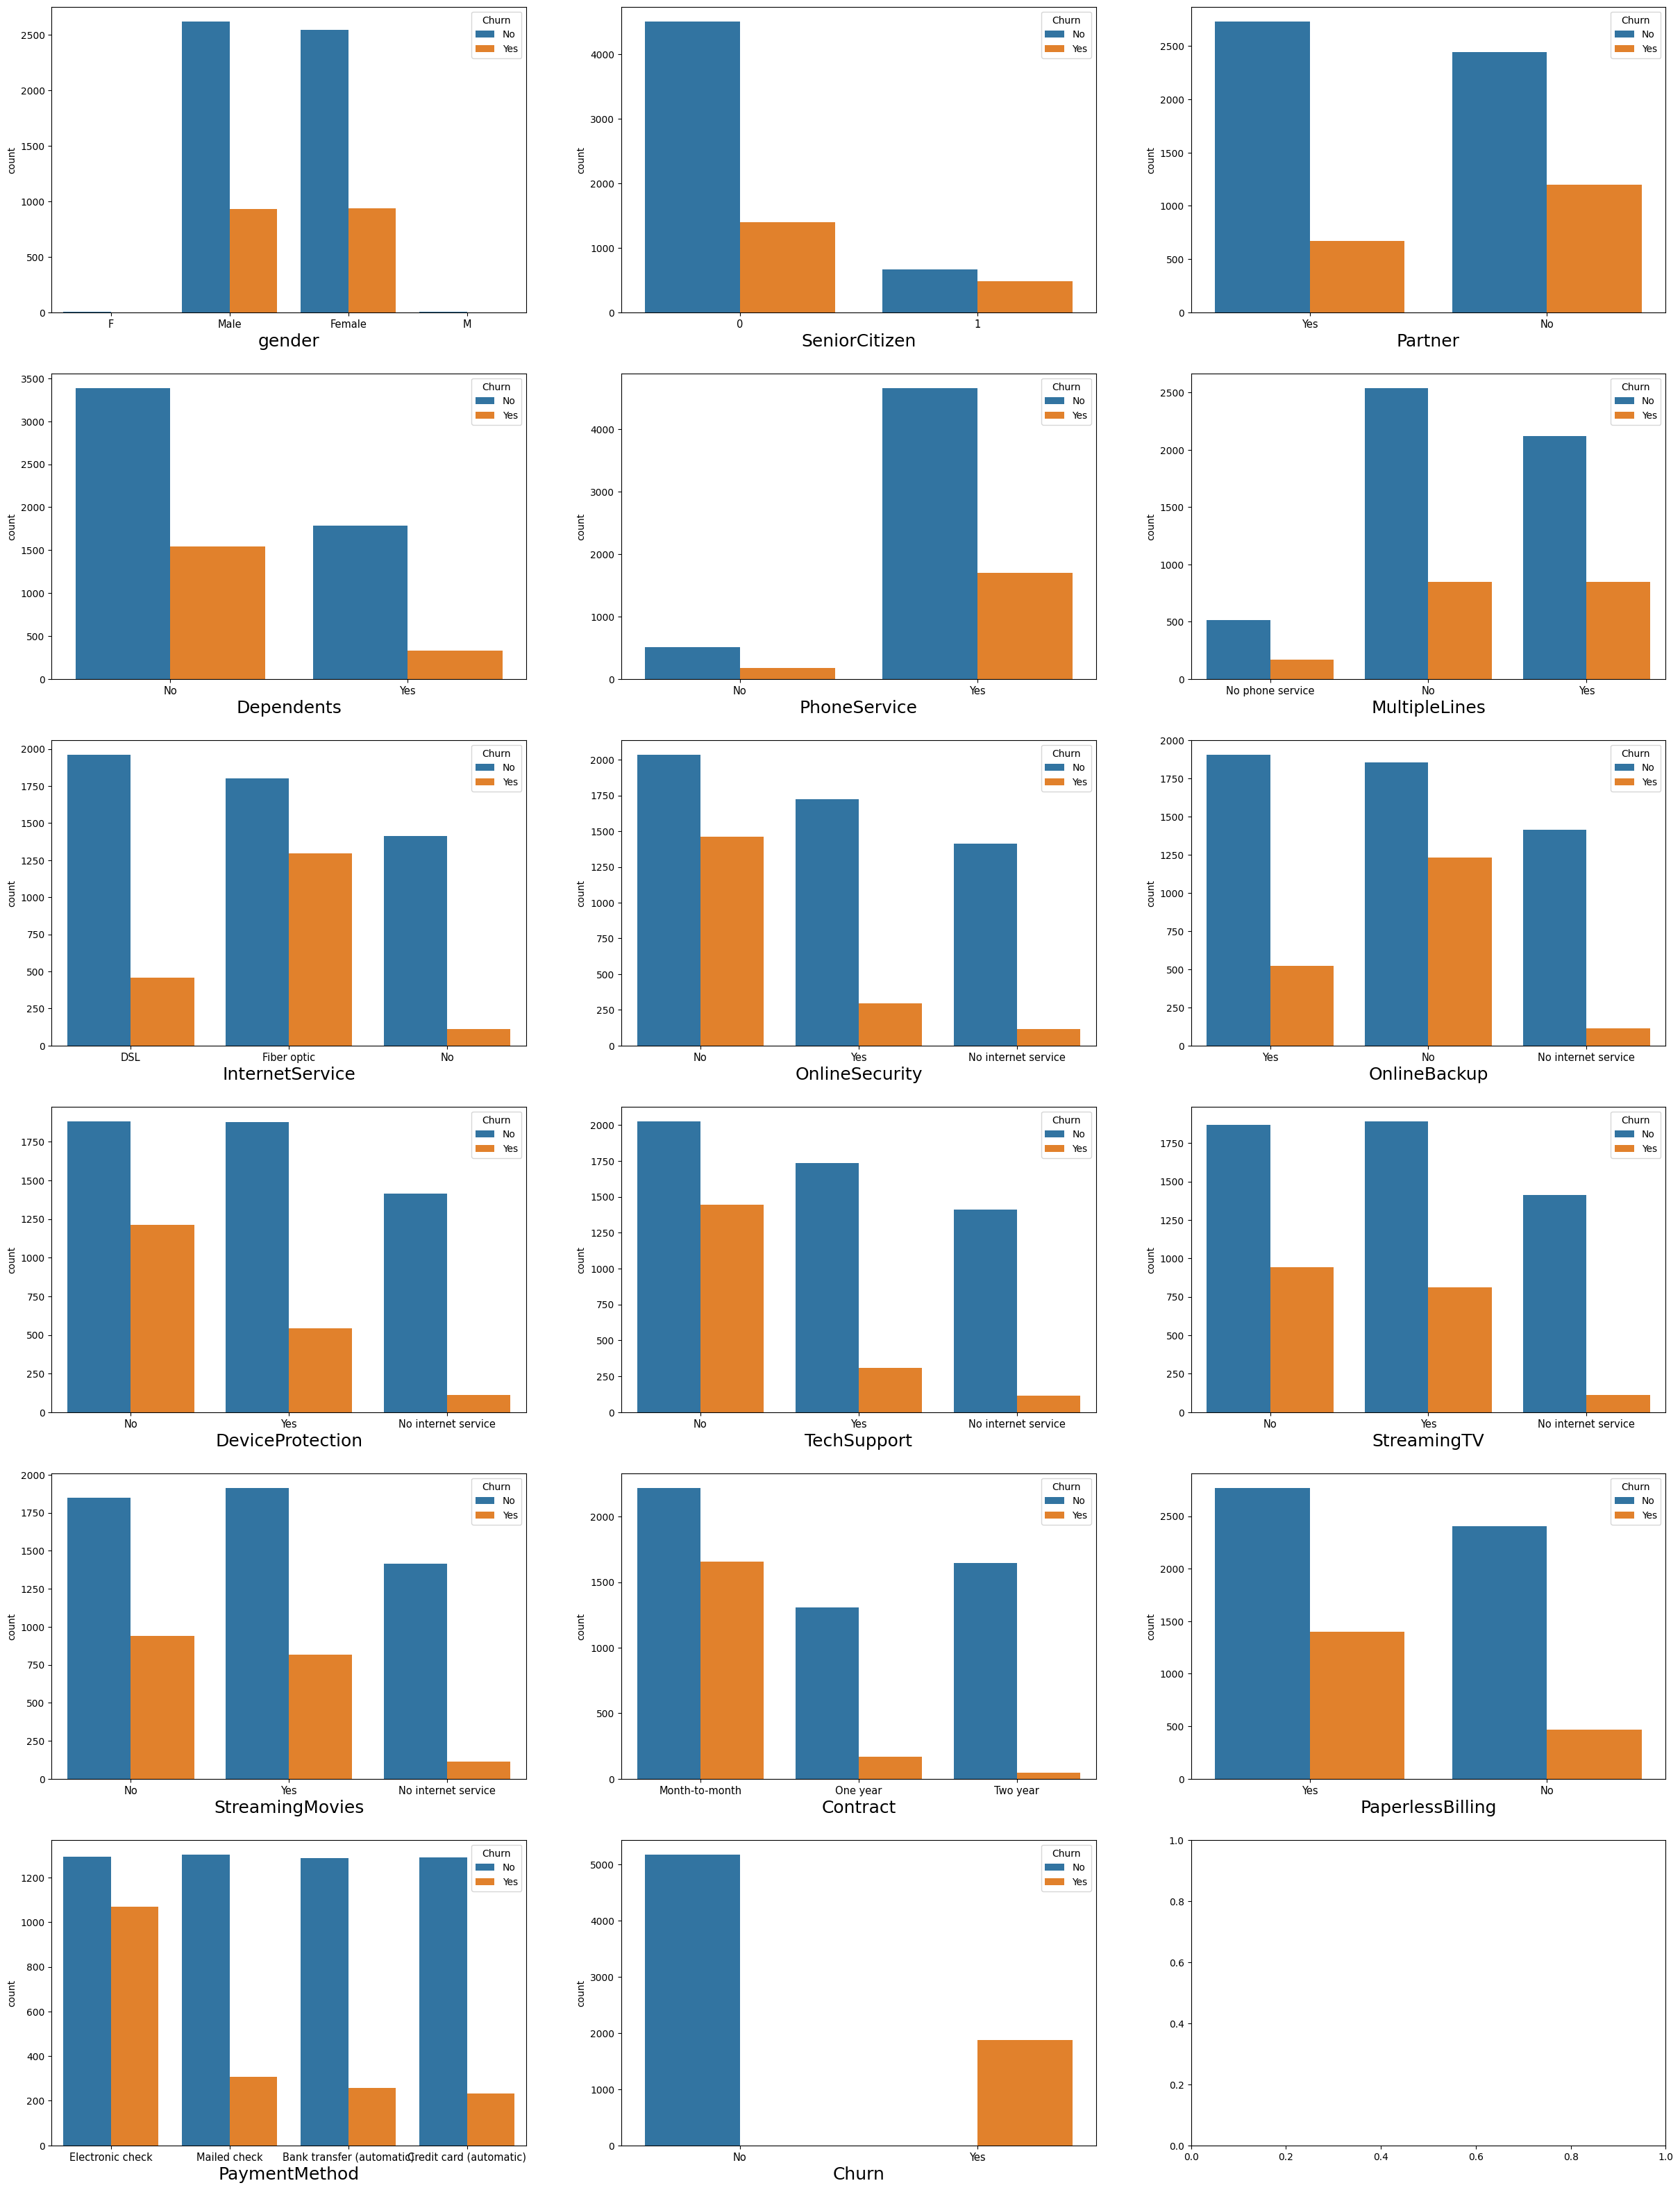

In [116]:
fig, ax = plt.subplots(6, 3, figsize=(30,40))

for i, ax in enumerate(fig.axes):
    if i < len(data_kategori.columns):
        sns.countplot(x = data_kategori.columns[i], hue='Churn', data=data_kategori, ax=ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), fontsize=10.5)
        ax.set_xlabel(data_kategori.columns[i], fontsize=18)

plt.show()

**Bukti 3 Memvalidasi data**

In [117]:
data.isnull().sum()

gender               5
SeniorCitizen        0
Partner              0
Dependents           0
tenure               3
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

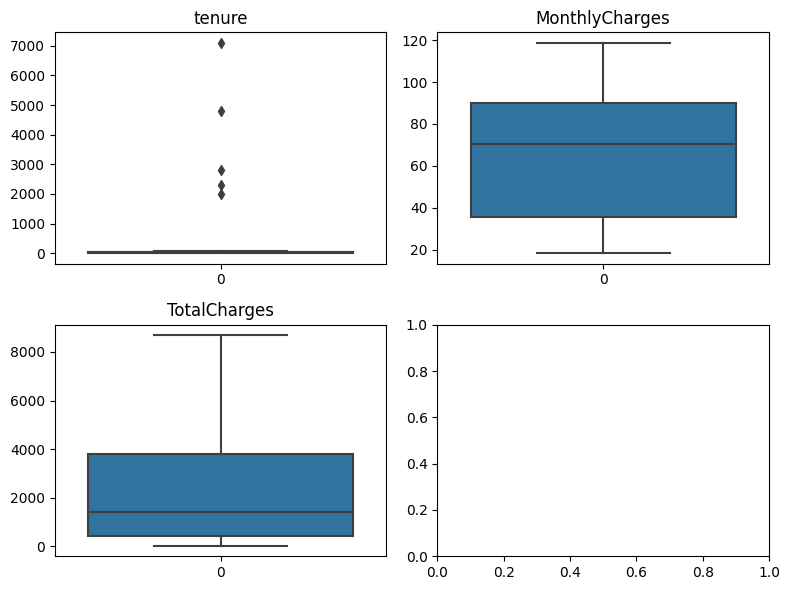

In [118]:
# Membuat boxplot untuk kolom numerik
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for variable, subplot in zip(selected_columns, ax.flatten()):
    sns.boxplot(data[variable], ax=subplot)
    subplot.set_title(variable)

plt.tight_layout()
plt.show()

**Bukti 4 Menentukan Objek Data**

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7038 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7040 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Bukti 5 membersihkan data**

In [120]:
data['gender'] = data['gender'].str.replace('Female', 'F')
data['gender'] = data['gender'].str.replace('Male', 'M')

In [121]:
data['gender'].fillna(data['gender'].mode()[0], inplace=True)

In [122]:
#handling outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-122-02a2e7db5072>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-122-02a2e7db5072>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-122-02a2e7db5072>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [123]:
data['tenure'].fillna(data['tenure'].median(), inplace=True)

<ipython-input-123-4cfa3bdb40f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tenure'].fillna(data['tenure'].median(), inplace=True)


In [124]:
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

<ipython-input-124-8688fadd70a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


**Bukti 6 Mengkontruksi Data**

In [125]:
df_encoded = data.copy()

df_encoded['gender'] = data['gender'].map({'M': 1, 'F': 0})
df_encoded['SeniorCitizen'] = data['SeniorCitizen']
df_encoded['Partner'] = data['Partner'].map({'No': 0, 'Yes': 1})
df_encoded['Dependents'] = data['Dependents'].map({'No': 0, 'Yes': 1})
df_encoded['PhoneService'] =  data['PhoneService'].map({'No': 0, 'Yes': 1})
df_encoded['MultipleLines'] = data['MultipleLines'].map({'No phone service': 0, 'No': 1, 'Yes': 2})
df_encoded['InternetService'] = data['InternetService'].map({'DSL': 0, 'Fiber optic': 1, 'No': 2})
df_encoded['OnlineSecurity'] = data['OnlineSecurity'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df_encoded['OnlineBackup'] = data['OnlineBackup'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df_encoded['DeviceProtection'] = data['DeviceProtection'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df_encoded['TechSupport'] = data['TechSupport'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df_encoded['StreamingTV'] = data['StreamingTV'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df_encoded['StreamingMovies'] = data['StreamingMovies'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df_encoded['Contract'] = data['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df_encoded['PaperlessBilling'] = data['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df_encoded['PaymentMethod'] = data['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
df_encoded['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

<ipython-input-126-7d4736e6f507>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


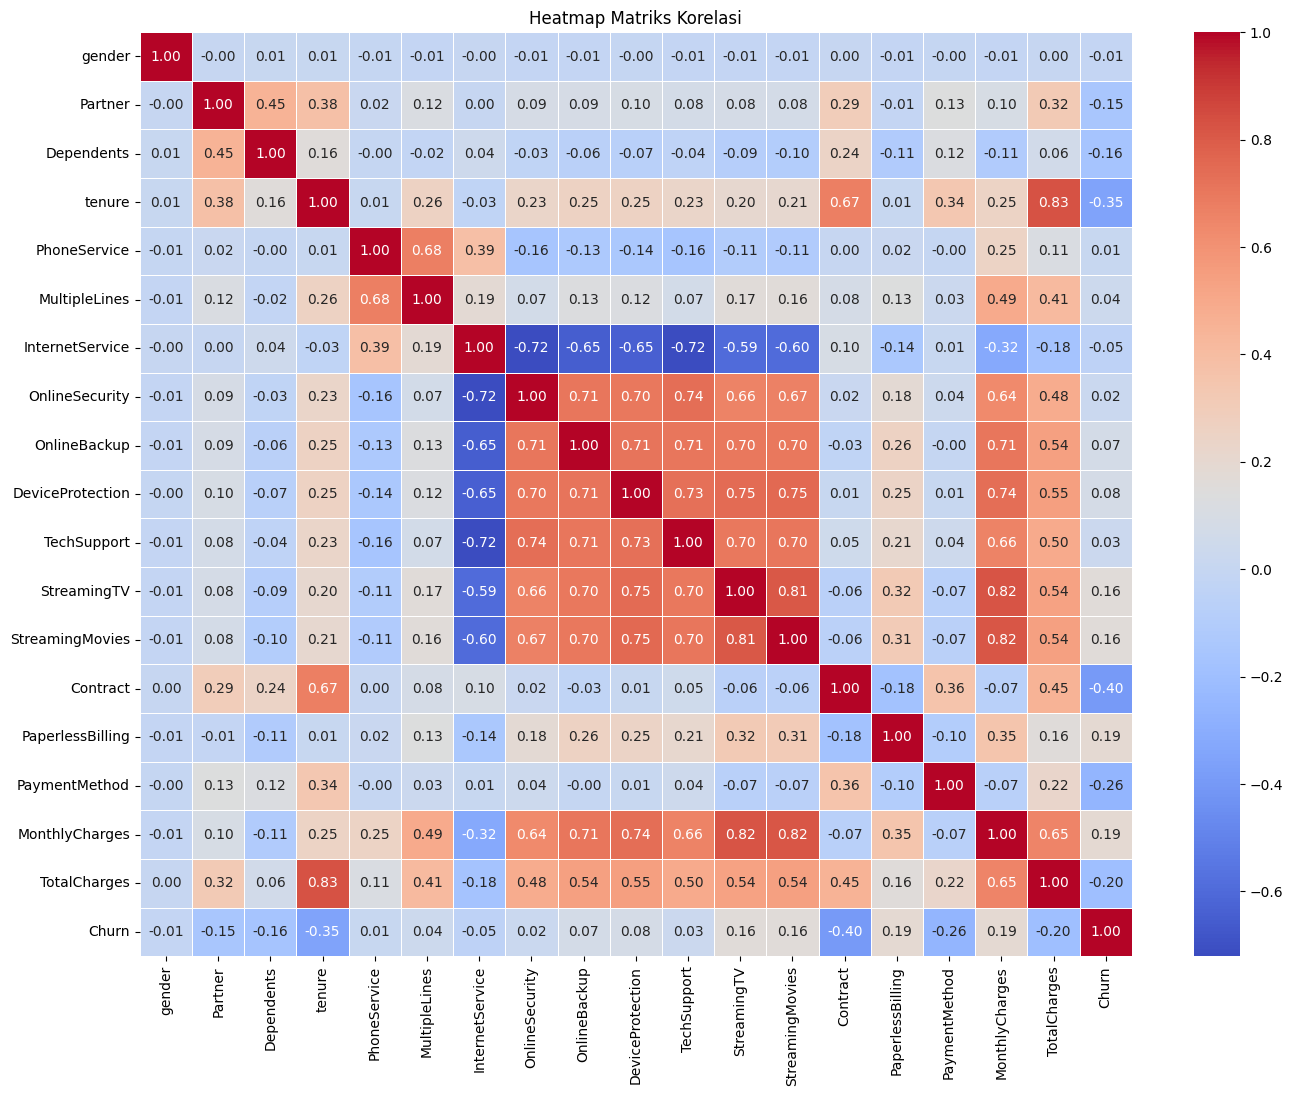

In [126]:
# Hitung matriks korelasi
correlation_matrix = df_encoded.corr()

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Heatmap Matriks Korelasi")
plt.show()

In [127]:
kolom_kategori = [i for i in data.columns if data[i].dtype == 'object']
kolom_numerik = [i for i in data.columns if data[i].dtype != 'object']
kolom_numerik.append('Churn')
data_numerik = data[kolom_numerik]
data_kategori = data[kolom_kategori]

In [128]:
data_kategori_encoded = pd.get_dummies(data_kategori, drop_first=True)

<ipython-input-128-cb9b41d320a3>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_kategori_encoded = pd.get_dummies(data_kategori, drop_first=True)


In [129]:
data_kategori_encoded = data_kategori_encoded.rename(columns={'Churn_Yes':'Churn'})
data_kategori_encoded.head()

,gender_M,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [130]:
data_numerik.drop(columns=['Churn'], axis=1, inplace=True)

<ipython-input-130-75fd9620e681>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numerik.drop(columns=['Churn'], axis=1, inplace=True)


In [131]:
#gabungkan data
new_data = pd.concat([data_numerik, data_kategori_encoded], axis=1)

**bukti 7 Menentukan Label Data**

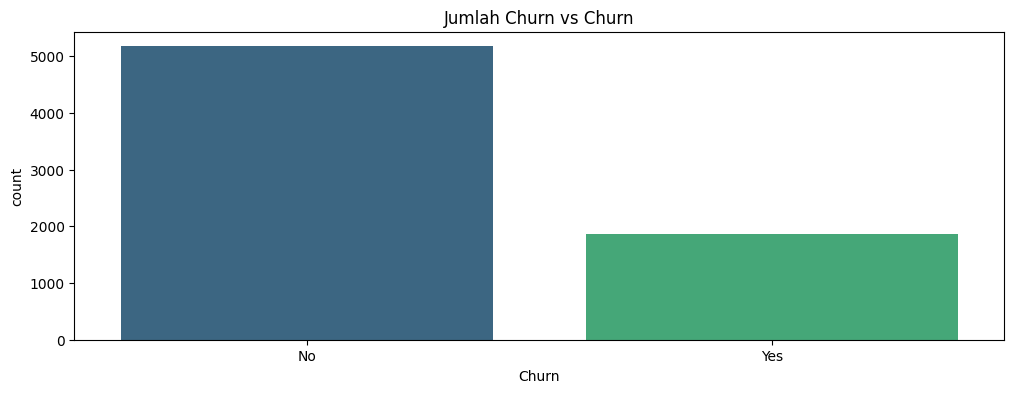

In [132]:
total_churn = ['Churn']

plt.figure(figsize=(12, 4))
for var in total_churn:
    plt.subplot(1, len(total_churn), total_churn.index(var) + 1)
    sns.countplot(x=var, data=data, palette='viridis')
    plt.title(f'Jumlah Churn vs {var}')

In [133]:
data["Churn"].value_counts()

No     5171
Yes    1867
Name: Churn, dtype: int64

**Bukti 8 Membangun Model**

In [134]:
X = new_data.drop(columns=['Churn'], axis=1)
y = new_data['Churn']

In [135]:
#split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [136]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [137]:
#Logistic Regression
log_reg = LogisticRegression()
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
y_pred_log = pipe.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred_log)

**Bukti 9 Evaluasi Model**

Evaluate decision tree

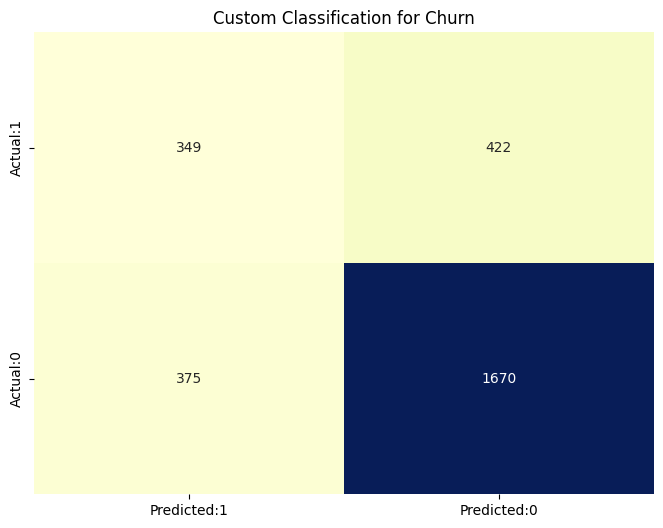

In [138]:
cm_dt = confusion_matrix(y_test, dt_pred)

conf_matrix_dt_custom = pd.DataFrame(data=[[cm_dt[1, 1], cm_dt[0, 1]],
                                           [cm_dt[1, 0], cm_dt[0, 0]]],
                                     columns=['Predicted:1', 'Predicted:0'],
                                     index=['Actual:1', 'Actual:0'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_custom, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title('Custom Classification for Churn')
plt.show()

In [139]:
accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7169744318181818
Precision: 0.45265888456549935
Recall: 0.48204419889502764
F1 Score: 0.4668896321070234


Evaluate Logistic Regression

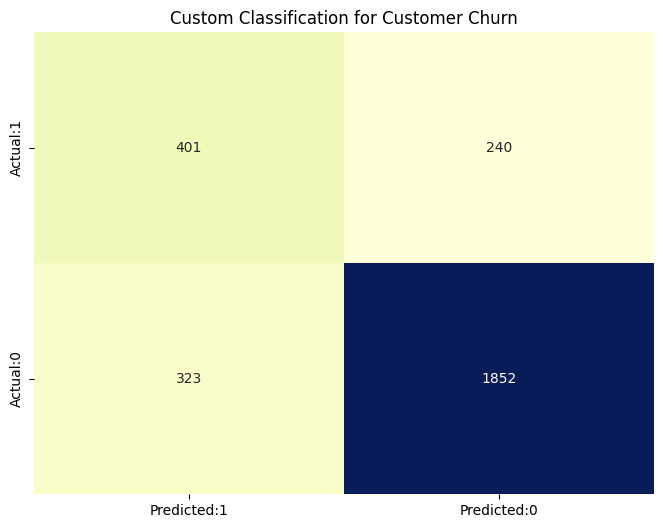

In [140]:
cm_lr = confusion_matrix(y_test, y_pred_log)

conf_matrix_lr_custom = pd.DataFrame(data=[[cm_lr[1, 1], cm_lr[0, 1]],
                                           [cm_lr[1, 0], cm_lr[0, 0]]],
                                     columns=['Predicted:1', 'Predicted:0'],
                                     index=['Actual:1', 'Actual:0'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_custom, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title('Custom Classification for Customer Churn')
plt.show()

In [141]:
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8000710227272727
Precision: 0.625585023400936
Recall: 0.5538674033149171
F1 Score: 0.5875457875457875


In [142]:
coefs = pipe.named_steps['logisticregression'].coef_[0]

# Buat DataFrame untuk menampilkan hasil
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefs
})

feature_importance_df = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)

feature_importance_df

,Feature,Coefficient
0,tenure,-1.343814
25,Contract_Two year,-0.677094
2,TotalCharges,0.573609
10,InternetService_Fiber optic,0.423772
24,Contract_One year,-0.333803
13,OnlineSecurity_Yes,-0.173202
28,PaymentMethod_Electronic check,0.166033
21,StreamingTV_Yes,0.152106
9,MultipleLines_Yes,0.130567
1,MonthlyCharges,-0.126732
